# Lab | Customer Analysis Round 4

For this lab, we still keep using the `marketing_customer_analysis.csv` file that you can find in the `files_for_lab` folder.

### Get the data

We are using the `marketing_customer_analysis.csv` file.

### Dealing with the data

Already done in the round 2.

### Explore the data

Done in the round 3.

### Processing Data

- Get the numeric data.
- Check normality.
- Check multicollinearity.


In [2]:
import pandas as pd
import numpy as np

In [3]:
df=pd.read_csv("marketing_customer_analysis.csv")

In [4]:
df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [41]:
#Get the numerical data. 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [46]:
df_num=df.select_dtypes("number")
df_num.describe()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


In [15]:
desc=df.describe(include=[np.number])
desc

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


# Check normality

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

## Method 1 : Qualitative tests

### A) Histogram Plot

A sample of data has a Gaussian distribution of the histogram plot, showing the familiar bell shape.

#### Code

fig, ax = plt.subplots(figsize=(14, 18),squeeze=True)

plt.subplot()
df.column_name.hist(color="")

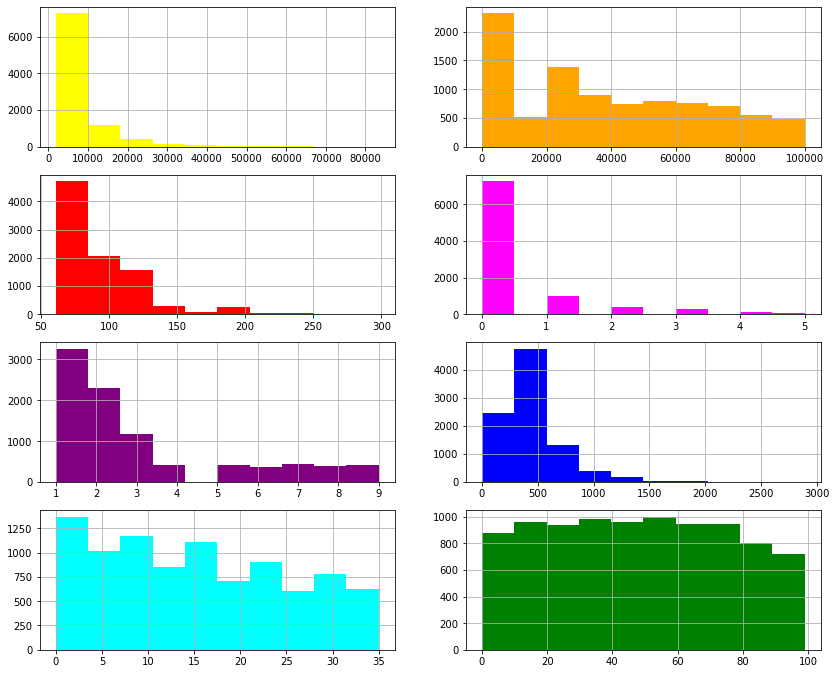

In [49]:
fig,ax=plt.subplots(figsize=(14, 18),squeeze=True)

plt.subplot(621) 
df_num["Customer Lifetime Value"].hist(color="yellow")
plt.subplot(622) 
df_num["Income"].hist(color="orange")
plt.subplot(623) 
df_num["Monthly Premium Auto"].hist(color="red")
plt.subplot(624) 
df_num["Number of Open Complaints"].hist(color="magenta")
plt.subplot(625) 
df_num["Number of Policies"].hist(color="purple")
plt.subplot(626) 
df_num["Total Claim Amount"].hist(color="blue")
plt.subplot(627) 
df_num["Months Since Last Claim"].hist(color="cyan")
plt.subplot(628) 
df_num["Months Since Policy Inception"].hist(color="green")

plt.show()

Histogram:  Customer Lifetime Value


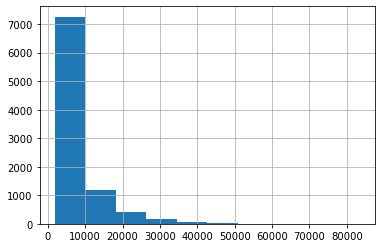

Histogram:  Income


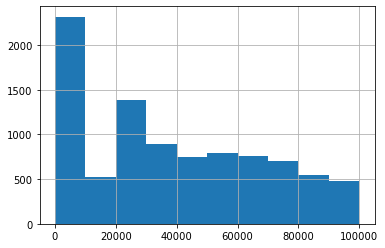

Histogram:  Monthly Premium Auto


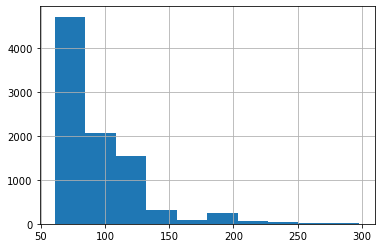

Histogram:  Months Since Last Claim


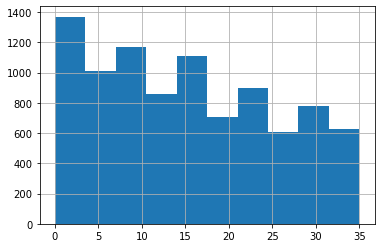

Histogram:  Months Since Policy Inception


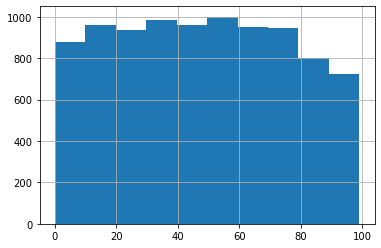

Histogram:  Number of Open Complaints


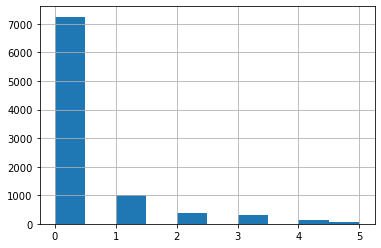

Histogram:  Number of Policies


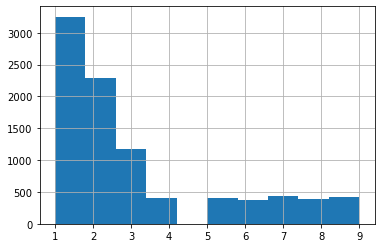

Histogram:  Total Claim Amount


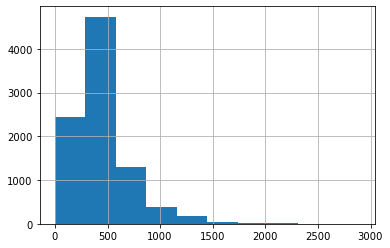

In [52]:
#Faster alternative
from statsmodels.graphics.gofplots import qqplot

cols = list(df_num)
for col in cols:
    print("Histogram: ",col)
    df_num[col].hist()
    pyplot.show()

plt.show()

### B) Q-Q Plot

A first quick "qualitative visual" test for normality is a Q-Q plot. It compares the quantiles of the sample against the theoretical distribution we want to compare it with distribution (in this case normal)

#### Code

    from statsmodels.graphics.gofplots import qqplot
    from matplotlib import pyplot

    cols = list(data.columns)
    for col in cols:
    print("Q-Q plot for variable: ",col)
    qqplot(data[col], line='s')
    pyplot.show()

Alternatively:

    qqplot(marketing_customer_analysis_numeric["Income"], line='s')
    qqplot(marketing_customer_analysis_numeric["Monthly Premium Auto"], line='s')
    qqplot(marketing_customer_analysis_numeric["Months Since Last Claim"], line='s')
    qqplot(marketing_customer_analysis_numeric["Months Since Policy Inception"], line='s')
    qqplot(marketing_customer_analysis_numeric["Number of Open Complaints"], line='s')
    qqplot(marketing_customer_analysis_numeric["Number of Policies"], line='s')


Q-Q plot for variable:  Customer Lifetime Value


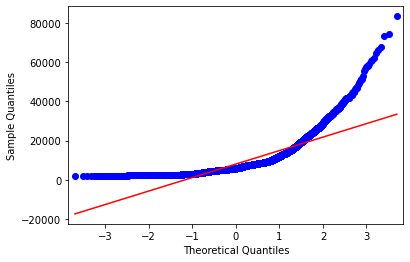

Q-Q plot for variable:  Income


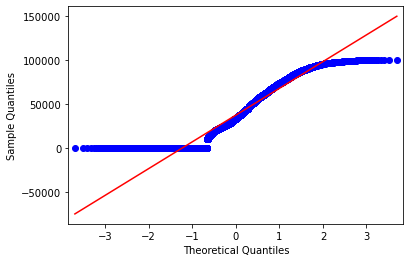

Q-Q plot for variable:  Monthly Premium Auto


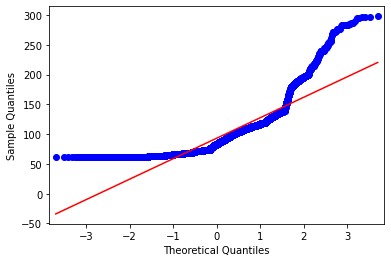

Q-Q plot for variable:  Months Since Last Claim


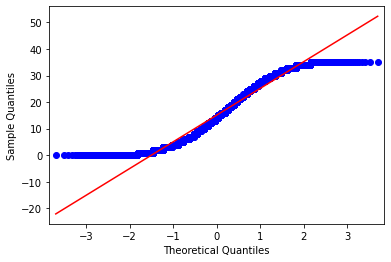

Q-Q plot for variable:  Months Since Policy Inception


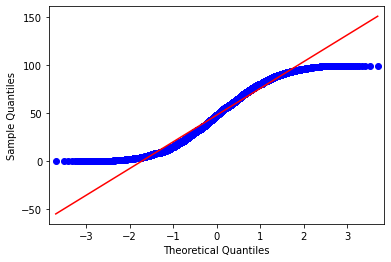

Q-Q plot for variable:  Number of Open Complaints


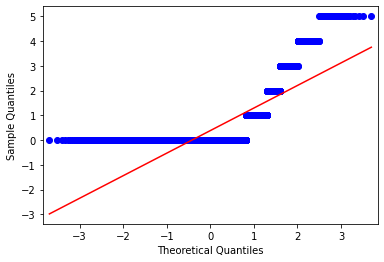

Q-Q plot for variable:  Number of Policies


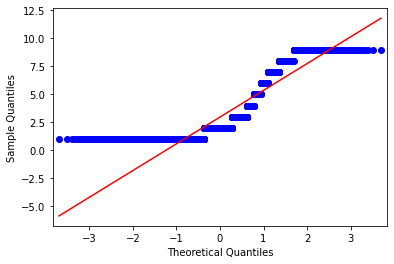

Q-Q plot for variable:  Total Claim Amount


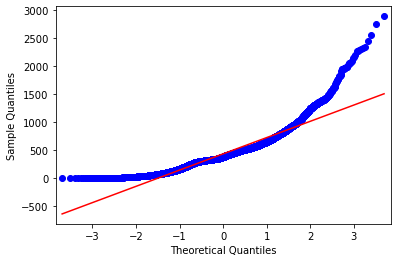

In [60]:
from statsmodels.graphics.gofplots import qqplot

cols = list(df_num)
for col in cols:
    print("Q-Q plot for variable: ",col)
    qqplot(df_num[col], line='s')
    plt.show()

### C. Boxplot

Boxplot for variable:  Customer Lifetime Value


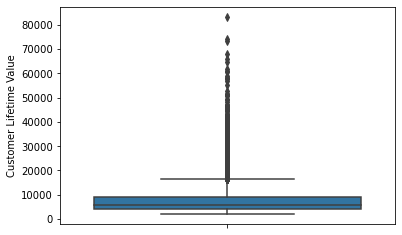

Boxplot for variable:  Income


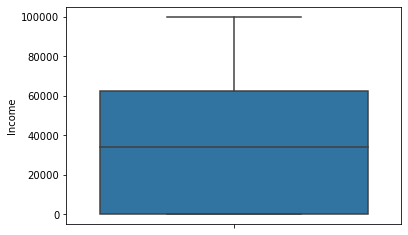

Boxplot for variable:  Monthly Premium Auto


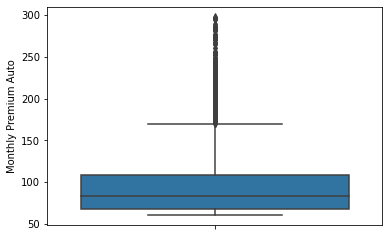

Boxplot for variable:  Months Since Last Claim


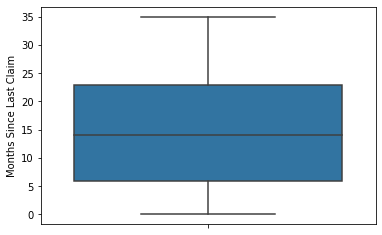

Boxplot for variable:  Months Since Policy Inception


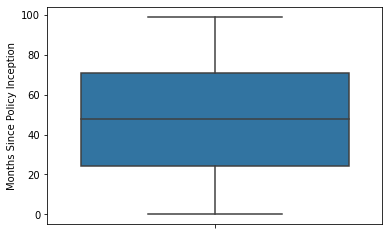

Boxplot for variable:  Number of Open Complaints


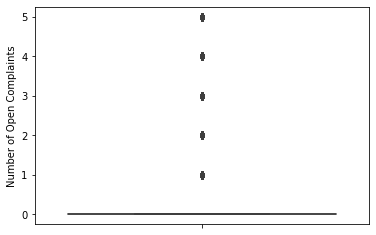

Boxplot for variable:  Number of Policies


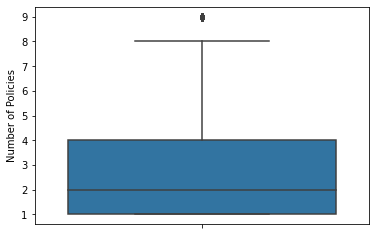

Boxplot for variable:  Total Claim Amount


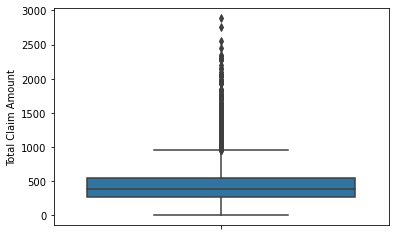

In [61]:
cols = list(df_num)
for col in cols:
    print("Boxplot for variable: ",col)
    sns.boxplot(y=df_num[col])
    plt.show()

## Method 2 : Quantitative tests

### A) Shapiro-Wilk

The Shapiro-Wilk test evaluates a data sample and quantifies how likely it is that the data was drawn from a Gaussian distribution, named for Samuel Shapiro and Martin Wilk.

In practice, the Shapiro-Wilk test is believed to be a reliable test of normality, although there is some suggestion that the test may be suitable for smaller samples of data, e.g. thousands of observations or fewer.


##### Step 1
- Ho: the "null hypothesis" (no differences)
- H1: the alternative

##### Step 2
- Set the significance level (s) (90%,95%,99%)
- The threshold is then pc = (1-s)

##### Step 3
- Get the p-value = P(D|Ho) and compare it with pc
- if (p-value<pc): discard the Ho; else: Accept Ho


####  Code

    from scipy.stats import shapiro

    column_names = list(marketing_customer_analysis_numeric.columns)

    for i in column_names:
    print('\n')
    print("Column: ", i)
    # normality test
    stat, p = shapiro(marketing_customer_analysis_numeric[i])
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    # interpret
    alpha = 0.05
    if p > alpha:
        print('Sample looks Gaussian (fail to reject H0)')
    else:
        print('Sample does not look Gaussian (reject H0)')

In [63]:
from scipy.stats import shapiro

cols=list(df_num)

for col in cols:
    print('\n')
    print("Column: ", col)
    # normality test
    stat, p = shapiro(df_num[col])
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    # interpret
    alpha = 0.05
    if p > alpha:
        print('Sample looks Gaussian (fail to reject H0)')
    else:
        print('Sample does not look Gaussian (reject H0)')



Column:  Customer Lifetime Value
Statistics=0.703, p=0.000
Sample does not look Gaussian (reject H0)


Column:  Income
Statistics=0.922, p=0.000
Sample does not look Gaussian (reject H0)


Column:  Monthly Premium Auto
Statistics=0.789, p=0.000
Sample does not look Gaussian (reject H0)


Column:  Months Since Last Claim
Statistics=0.950, p=0.000
Sample does not look Gaussian (reject H0)


Column:  Months Since Policy Inception
Statistics=0.961, p=0.000
Sample does not look Gaussian (reject H0)


Column:  Number of Open Complaints
Statistics=0.487, p=0.000
Sample does not look Gaussian (reject H0)


Column:  Number of Policies
Statistics=0.780, p=0.000
Sample does not look Gaussian (reject H0)


Column:  Total Claim Amount
Statistics=0.888, p=0.000
Sample does not look Gaussian (reject H0)


### B) D’Agostino’s K^2 Test

The D’Agostino’s K^2 test calculates summary statistics from the data, namely kurtosis and skewness, to determine if the data distribution departs from the normal distribution, named for Ralph D’Agostino.

- Skew is a quantification of how much a distribution is pushed left or right, a measure of asymmetry in the distribution.
- Kurtosis quantifies how much of the distribution is in the tail. It is a simple and commonly used statistical test for normality.

#### Code

    from scipy.stats import normaltest

    column_names = list(marketing_customer_analysis_numeric.columns)

    for i in column_names:
    print('\n')
    print("Column: ", i)
    # normality test
    stat, p = normaltest(marketing_customer_analysis_numeric[i])
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    # interpret
    alpha = 0.05
    if p > alpha:
        print('Sample looks Gaussian (fail to reject H0)')
    else:
        print('Sample does not look Gaussian (reject H0)')


In [66]:
from scipy.stats import normaltest

cols = list(df_num)

for col in cols:
    print('\n')
    print("Column: ", col)
    # normality test
    stat, p = normaltest(df_num[col])
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    # interpret
    alpha = 0.05
    if p > alpha:
        print('Sample looks Gaussian (fail to reject H0) - Normal Dist')
    else:
        print("Sample does not look Gaussian (reject H0) - Not Normal Dist")



Column:  Customer Lifetime Value
Statistics=6056.611, p=0.000
Sample does not look Gaussian (reject H0) - Not Normal Dist


Column:  Income
Statistics=3720.270, p=0.000
Sample does not look Gaussian (reject H0) - Not Normal Dist


Column:  Monthly Premium Auto
Statistics=4064.718, p=0.000
Sample does not look Gaussian (reject H0) - Not Normal Dist


Column:  Months Since Last Claim
Statistics=3281.472, p=0.000
Sample does not look Gaussian (reject H0) - Not Normal Dist


Column:  Months Since Policy Inception
Statistics=4660.446, p=0.000
Sample does not look Gaussian (reject H0) - Not Normal Dist


Column:  Number of Open Complaints
Statistics=5201.269, p=0.000
Sample does not look Gaussian (reject H0) - Not Normal Dist


Column:  Number of Policies
Statistics=1535.744, p=0.000
Sample does not look Gaussian (reject H0) - Not Normal Dist


Column:  Total Claim Amount
Statistics=3401.598, p=0.000
Sample does not look Gaussian (reject H0) - Not Normal Dist


# Multicolinearity

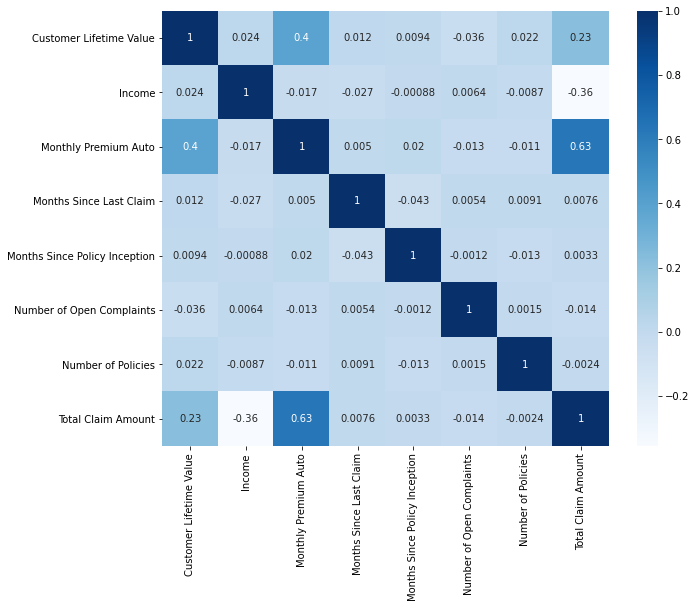

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_matrix, annot=True,cmap="Blues")
plt.show()